# Finding Transformation between Two Cameras 
1. Stretch Camera ( has a known transformation from base frame)
2. Manip/Arm Camera ( unknown from base frame)

In [4]:
from ai2thor.robot_client import Controller
from ai2thor.robot_grasping import ObjectDetector, GraspPlanner
import matplotlib.pyplot as plt
import cv2
import numpy as np


# initialize 
host = '172.16.121.188'#248' # '172.16.121.205' 
#c = Controller(host=host, port=50051, width=1280, height=720, get_depth=False, multi_thread=False, camera_sources=["arm", "stretch"])

In [5]:
c = Controller(host=host, port=50051, width=1280, height=720, get_depth=True, multi_thread=False, camera_sources=["nav", "arm", "stretch"])

In [34]:
c.step("Pass")

['Pass']  action completed:  1.2234408855438232
Getting ALL Observations
all images respone time: 0.9662179946899414
Getting ALL Observations
all images respone time: 0.8492369651794434
Getting ALL Observations
all images respone time: 0.7971558570861816
[Step] Processing time:  3.954511880874634
Last Event constructed.  3.9580860137939453


<ai2thor.server.Event at 0x347793940
    .metadata["lastAction"] = {'action': ['Pass']}
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "0
    .metadata["actionReturn"] = []
>

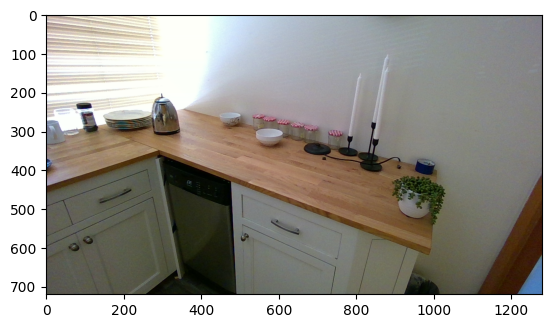

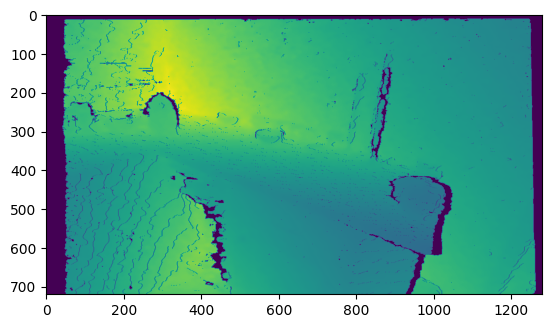

True

In [37]:
nav_image = c.last_event.frame
plt.imshow(nav_image)
plt.show()
cv2.imwrite("nav_image_rgb_2.png", cv2.cvtColor(nav_image, cv2.COLOR_BGR2RGB))

nav_image = c.last_event.depth_frame
plt.imshow(nav_image)
plt.show()
cv2.imwrite("nav_image_depth_2.png", nav_image)



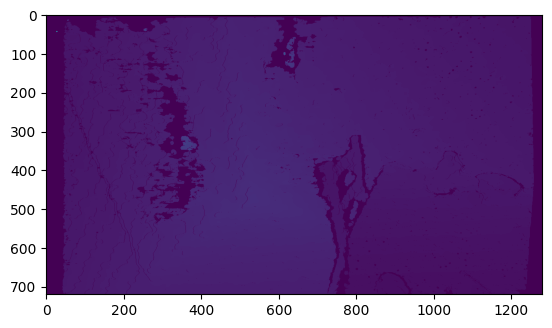

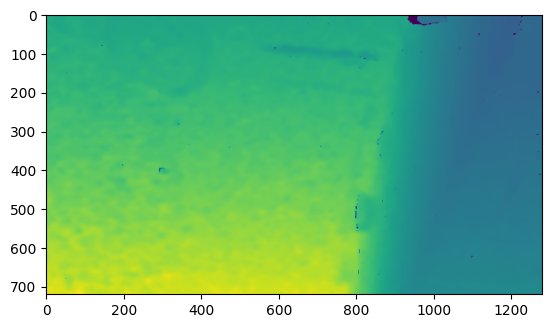

True

In [36]:
arm_image = c.last_event.third_party_depth_frames[0]
stretch_image = c.last_event.third_party_depth_frames[1]

plt.imshow(arm_image)
plt.show()
plt.imshow(stretch_image)
plt.show()

cv2.imwrite("arm_image_depth_2.png", arm_image)
cv2.imwrite("stretch_image_depth_2.png", stretch_image)

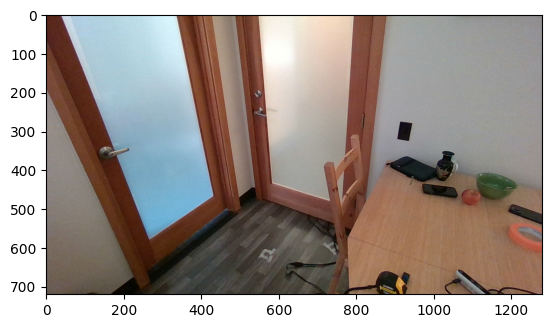

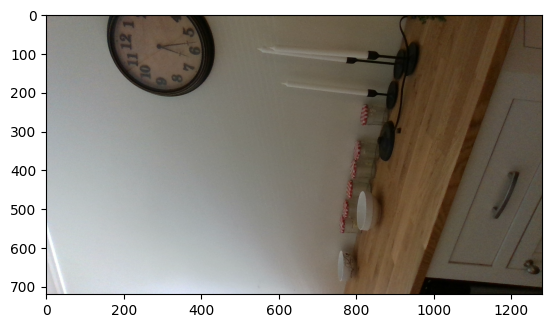

True

In [35]:
arm_image = c.last_event.third_party_camera_frames[0]
stretch_image = c.last_event.third_party_camera_frames[1]

plt.imshow(arm_image)
plt.show()
plt.imshow(stretch_image)
plt.show()

cv2.imwrite("arm_image_rgb_2.png", cv2.cvtColor(arm_image, cv2.COLOR_BGR2RGB))
cv2.imwrite("stretch_image_rgb_2.png", cv2.cvtColor(stretch_image, cv2.COLOR_BGR2RGB))


In [ ]:
arm_image = c.last_event.third_party_camera_frames[0]
stretch_image = c.last_event.third_party_camera_frames[1]


[{'action': 'MoveArmExtension', 'args': {'move_scalar': 0.15}}]  action completed:  3.430756092071533
[Step] Processing time:  4.484844207763672
Last Event constructed.  4.484996795654297


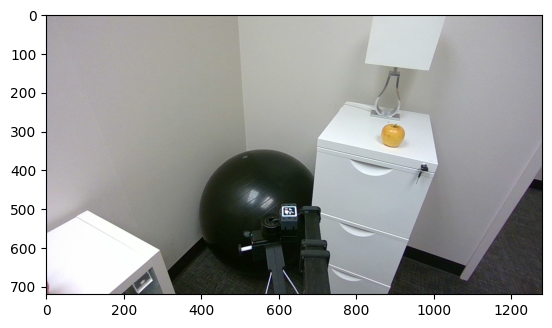

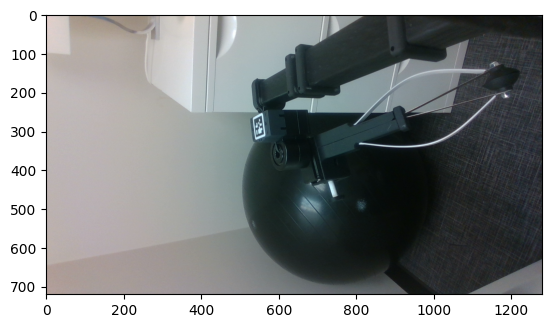

In [8]:
# rotate stretch camera to face the manipulation workspace
#c.step("RotateHead")

# move arm up and extend such that the aruco markers are visible from both camear
c.step({"action":[
                    {"action": "MoveArmExtension", "args": {"move_scalar": 0.15}},
                    #{"action": "MoveArmBase", "args": {"move_scalar": .1}},

]})

# get images
arm_image = c.last_event.third_party_camera_frames[0]
stretch_image = c.last_event.third_party_camera_frames[1]

plt.imshow(arm_image)
plt.show()
plt.imshow(stretch_image)
plt.show()


In [4]:
# Detect Aruco Marker
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
parameters =  cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(dictionary, parameters)

(array([[[613., 498.],
        [641., 497.],
        [642., 516.],
        [614., 517.]]], dtype=float32),)
[[133]]


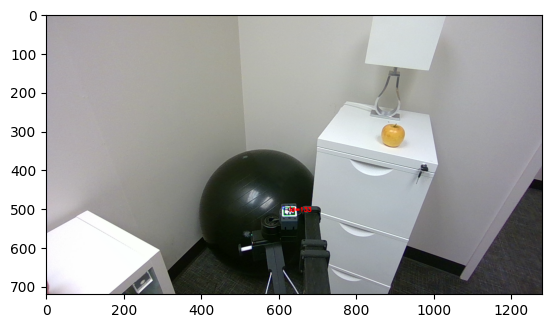

(array([[[542., 317.],
        [537., 271.],
        [556., 261.],
        [561., 309.]]], dtype=float32),)
[[133]]


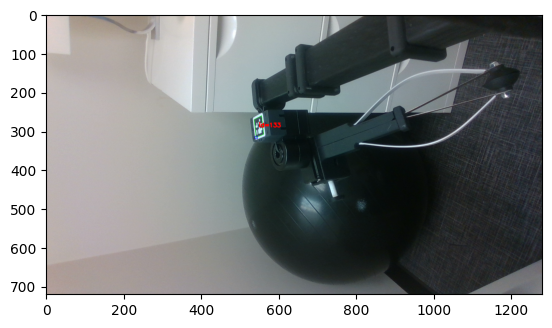

In [9]:
## ARM 
gray_arm_image = cv2.cvtColor(arm_image, cv2.COLOR_BGR2GRAY)

image_height, image_width = gray_arm_image.shape

arm_aruco_corners, arm_aruco_ids, aruco_rejected_image_points = detector.detectMarkers(gray_arm_image)

print(arm_aruco_corners)
print(arm_aruco_ids)

image=arm_image.copy()
cv2.aruco.drawDetectedMarkers(image, arm_aruco_corners, arm_aruco_ids) 
plt.imshow(image)
plt.show()


## STRETCH
gray_stretch_image = cv2.cvtColor(stretch_image, cv2.COLOR_BGR2GRAY)

image_height, image_width = gray_stretch_image.shape

stretch_aruco_corners, stretch_aruco_ids, aruco_rejected_image_points = detector.detectMarkers(gray_stretch_image)

print(stretch_aruco_corners)
print(stretch_aruco_ids)
#print(aruco_rejected_image_points)

image=stretch_image.copy()
stretch_image_w_aruco = cv2.aruco.drawDetectedMarkers(image, stretch_aruco_corners, stretch_aruco_ids) 
plt.imshow(image)
plt.show()

In [13]:
# Get Camera Intrinsics for pose estimation
stretch_cam_intr_file = "images/camera_intrinsics/camera_intrinsics_040322072387.txt"
arm_cam_intr_file = "images/camera_intrinsics/camera_intrinsics_203522252642.txt"

import json

with open(stretch_cam_intr_file, 'r') as file:
    # Load the JSON data from the file
    stretch_intr = json.load(file)
    # Print the loaded JSON data
    print(stretch_intr)

with open(arm_cam_intr_file, 'r') as file:
    # Load the JSON data from the file
    arm_intr = json.load(file)
    # Print the loaded JSON data
    print(arm_intr)


{'coeffs': [0.0, 0.0, 0.0, 0.0, 0.0], 'fx': 924.7802734375, 'fy': 924.7508544921875, 'height': 720, 'ppx': 648.2431030273438, 'ppy': 360.4836120605469, 'width': 1280, 'depth_scale': 0.0010000000474974513}
{'coeffs': [-0.05642872303724289, 0.07066791504621506, 0.00024385287542827427, 0.0014521401608362794, -0.02267066016793251], 'fx': 638.9337768554688, 'fy': 638.2869262695312, 'height': 720, 'ppx': 646.5670776367188, 'ppy': 364.27740478515625, 'width': 1280, 'depth_scale': 0.0010000000474974513}


In [14]:
## POSE ESTIMATION
def my_estimatePoseSingleMarkers(corners, marker_size, mtx, distortion):
    '''
    This will estimate the rvec and tvec for each of the marker corners detected by:
       corners, ids, rejectedImgPoints = detector.detectMarkers(image)
    corners - is an array of detected corners for each detected marker in the image
    marker_size - is the size of the detected markers
    mtx - is the camera matrix
    distortion - is the camera distortion matrix
    RETURN list of rvecs, tvecs, and trash (so that it corresponds to the old estimatePoseSingleMarkers())
    '''
    marker_points = np.array([[-marker_size / 2, marker_size / 2, 0],
                              [marker_size / 2, marker_size / 2, 0],
                              [marker_size / 2, -marker_size / 2, 0],
                              [-marker_size / 2, -marker_size / 2, 0]], dtype=np.float32)
    trash = []
    rvecs = []
    tvecs = []
    
    for c in corners:
        nada, R, t = cv2.solvePnP(marker_points, c, mtx, distortion, False, cv2.SOLVEPNP_IPPE_SQUARE)
        rvecs.append(R)
        tvecs.append(t)
        trash.append(nada)
    return rvecs, tvecs, trash


## STRETCH
length_of_marker_mm = 23.5
camera_matrix = np.array([[stretch_intr["fx"], 0, stretch_intr["ppx"]], [0, stretch_intr["fy"], stretch_intr["ppy"]], [0, 0, 1]])
distortion_coefficients = np.array(stretch_intr["coeffs"])
rvecs, tvecs, unknown_variable = my_estimatePoseSingleMarkers(stretch_aruco_corners,
                                                                         length_of_marker_mm,
                                                                         camera_matrix,
                                                                         distortion_coefficients)

stretch_aruco_rotation = rvecs[0]
stretch_aruco_position = tvecs[0]/1000.0 # Convert ArUco position estimate to be in meters.
print(stretch_aruco_rotation)
print(stretch_aruco_position)

P_aruco_from_stretch = np.identity(4)
P_aruco_from_stretch[:3,:3] = cv2.Rodrigues(stretch_aruco_rotation)[0]
P_aruco_from_stretch[0:3,3] = stretch_aruco_position.T
print(P_aruco_from_stretch)


## ARM
length_of_marker_mm = 23.5
camera_matrix = np.array([[arm_intr["fx"], 0, arm_intr["ppx"]], [0, arm_intr["fy"], arm_intr["ppy"]], [0, 0, 1]])
distortion_coefficients = np.array(arm_intr["coeffs"])
rvecs, tvecs, unknown_variable = my_estimatePoseSingleMarkers(arm_aruco_corners,
                                                                         length_of_marker_mm,
                                                                         camera_matrix,
                                                                         distortion_coefficients)

arm_aruco_rotation = rvecs[0]
arm_aruco_position = tvecs[0]/1000.0 # Convert ArUco position estimate to be in meters.
print(arm_aruco_rotation)
print(arm_aruco_position)

P_aruco_from_arm = np.identity(4)
P_aruco_from_arm[:3,:3] = cv2.Rodrigues(arm_aruco_rotation)[0]
P_aruco_from_arm[0:3,3] = arm_aruco_position.T
print(P_aruco_from_arm)


[[ 1.45172786]
 [-1.70056928]
 [-0.9038866 ]]
[[-0.0489978 ]
 [-0.03494408]
 [ 0.45558494]]
[[-0.11289476 -0.49087476 -0.86388468 -0.0489978 ]
 [-0.99066401  0.12247643  0.05986932 -0.03494408]
 [ 0.07641717  0.8625784  -0.50011891  0.45558494]
 [ 0.          0.          0.          1.        ]]
[[ 3.76126455]
 [-0.05273296]
 [ 0.0518891 ]]
[[-0.01603846]
 [ 0.12002954]
 [ 0.53490304]]
[[ 0.99929861 -0.01739881  0.03315986 -0.01603846]
 [-0.03343619 -0.81328997  0.5808971   0.12002954]
 [ 0.01686166 -0.58159841 -0.81330128  0.53490304]
 [ 0.          0.          0.          1.        ]]


## Useful relationships 

P_object_from_base = T_camera_from_base @ P_object_from_camera


T_stretch_from_arm @ P_aruco_from_stretch   = P_aruco_from_arm

T_arm_from_stretch @ P_aruco_from_arm   = P_aruco_from_stretch


T_arm_from_base =  T_stretch_from_base @ T_arm_from_stretch

==>

T_arm_from_stretch =  P_aruco_from_stretch @ (P_aruco_from_arm)_inverse = P_aruco_from_stretch @ P_arm_from_aruco




#### INVERSE OF HOMOGENEROUS MATRIX 

- R_inv => Transpose of R
- t_inv => -R_Inv * t

In [15]:
def inverse_homogeneous_matrix(matrix):
    """
    Compute the inverse of a 4x4 homogeneous transformation matrix.

    Args:
    matrix (numpy.ndarray): A 4x4 homogeneous transformation matrix.

    Returns:
    numpy.ndarray: The inverse of the input matrix.
    """
    if matrix.shape != (4, 4):
        raise ValueError("Input matrix must be a 4x4 matrix.")

    rotation_matrix = matrix[0:3, 0:3]
    translation_vector = matrix[0:3, 3]

    inverse_rotation = np.transpose(rotation_matrix)
    inverse_translation = -np.dot(inverse_rotation, translation_vector)

    inverse_matrix = np.identity(4)
    inverse_matrix[0:3, 0:3] = inverse_rotation
    inverse_matrix[0:3, 3] = inverse_translation

    return inverse_matrix


# compute inverse 
P_arm_from_aruco = inverse_homogeneous_matrix(P_aruco_from_arm)
print(P_arm_from_aruco)

# compute transformation matrix 
T_arm_from_stretch =  P_aruco_from_stretch @ P_arm_from_aruco
print(T_arm_from_stretch)

# confirmation
print("--------CONFIRMATION--------")
T_stretch_from_arm = inverse_homogeneous_matrix(T_arm_from_stretch)
recomputed_P_aruco_from_arm =  T_stretch_from_arm @ P_aruco_from_stretch
print(recomputed_P_aruco_from_arm)
print(P_aruco_from_arm)



# compute transfomration matrix for arm from base 
print("--------T_arm_from_base--------")
from scipy.spatial.transform import Rotation as R
r = R.from_quat([0.616, 0.616, -0.346, 0.345]) # camera_color_optical_frame
T_stretch_from_base = np.identity(4)
T_stretch_from_base[0:3, 0:3] = r.as_matrix()
T_stretch_from_base[0:3, 3] = np.array([-0.017, -0.038, 1.294])

T_arm_from_base =  T_stretch_from_base @ T_arm_from_stretch
print(T_arm_from_base)


[[ 0.99929861 -0.03343619  0.01686166  0.01102119]
 [-0.01739881 -0.81328997 -0.58159841  0.40843853]
 [ 0.03315986  0.5808971  -0.81330128  0.36584435]
 [ 0.          0.          0.          1.        ]]
[[-0.13292123 -0.09882981  0.98618691 -0.56678153]
 [-0.99011485 -0.03170691 -0.13662813  0.02606457]
 [ 0.04477187 -0.99459908 -0.09363835  0.62577172]
 [ 0.          0.          0.          1.        ]]
--------CONFIRMATION--------
[[ 0.99929861 -0.01739881  0.03315986 -0.01603846]
 [-0.03343619 -0.81328997  0.5808971   0.12002954]
 [ 0.01686166 -0.58159841 -0.81330128  0.53490304]
 [ 0.          0.          0.          1.        ]]
[[ 0.99929861 -0.01739881  0.03315986 -0.01603846]
 [-0.03343619 -0.81328997  0.5808971   0.12002954]
 [ 0.01686166 -0.58159841 -0.81330128  0.53490304]
 [ 0.          0.          0.          1.        ]]
--------T_arm_from_base--------
[[-0.99007709 -0.03041019 -0.13719542  0.00868434]
 [-0.10682328  0.79719857  0.59419124 -0.86751574]
 [ 0.09130252  0.

In [16]:
T_arm_from_base

array([[-0.99007709, -0.03041019, -0.13719542,  0.00868434],
       [-0.10682328,  0.79719857,  0.59419124, -0.86751574],
       [ 0.09130252,  0.6029508 , -0.79253655,  1.45133677],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

# GRASPING TEST

In [1]:
from ai2thor.robot_client import Controller
from ai2thor.robot_grasping import ObjectDetector, GraspPlanner
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [2]:
from ai2thor.robot_grasping import OwlVitSegAnyObjectDetector

fastsam_path = "ai2thor/model_checkpoints/FastSAM.pt"
ow_detector = OwlVitSegAnyObjectDetector(fastsam_path, camera_source="arm205", device="cpu")
detector = ObjectDetector()
host = '172.16.121.248' # '172.16.121.205' 
c = Controller(host=host, port=50051, width=1280, height=720, get_depth=True, multi_thread=False, camera_sources=["arm"])

/Users/yejink/anaconda3/envs/ai2thor2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['Pass']  action completed:  1.102660894393921
Getting ALL Observations
all images respone time: 0.932988166809082
[Step] Processing time:  2.0959959030151367
Last Event constructed.  2.096470832824707


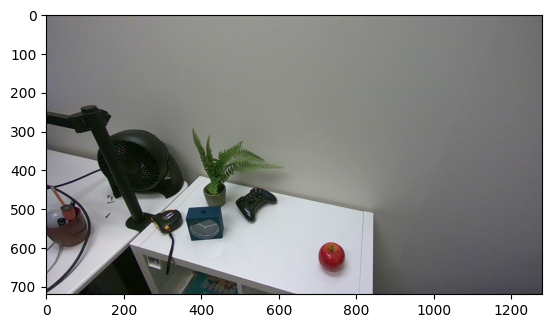

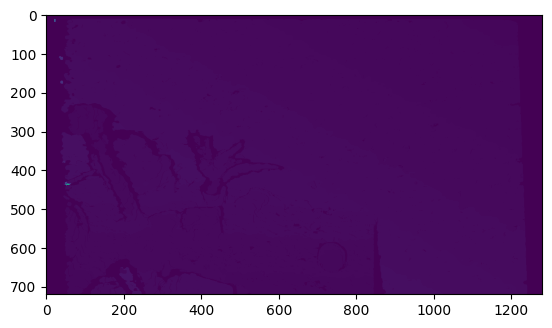

In [72]:
c.step("Pass")

# get images
arm_image = c.last_event.third_party_camera_frames[0]
depth_arm_image = c.last_event.third_party_depth_frames[0]
plt.imshow(arm_image)
plt.show()
plt.imshow(depth_arm_image)
plt.show()

[58 41]


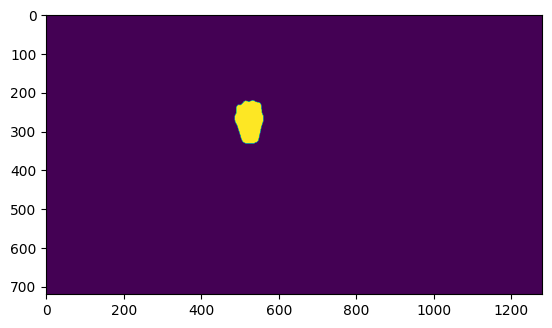

In [20]:
predict_classes, predict_masks = detector.predict_instance_segmentation(arm_image)
print(predict_classes)
#detector.get_target_mask()
mask = predict_masks[0]
plt.imshow(mask) #predict_masks[1])

[{'scores': tensor([0.2045]), 'labels': tensor([0]), 'boxes': tensor([[701.6667, 586.1120, 773.9835, 662.4167]])}]
[702, 586, 774, 662]


[{'scores': tensor([0.2045]), 'labels': tensor([0]), 'boxes': tensor([[701.6667, 586.1120, 773.9835, 662.4167]])}]


0: 576x1024 29 objects, 811.2ms
Speed: 2.5ms preprocess, 811.2ms inference, 60.9ms postprocess per image at shape (1, 3, 1024, 1024)


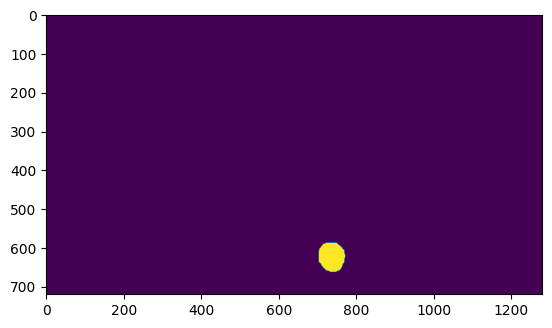

In [73]:
#ret = ow_detector.predict_object_detection(arm_image, "apple")
#print(ret)
mask = ow_detector.get_target_mask( "apple", arm_image)

plt.imshow(mask)

pcd pointcloud numbers:  3935
pcd pointcloud numbers after outlier removal:  2804


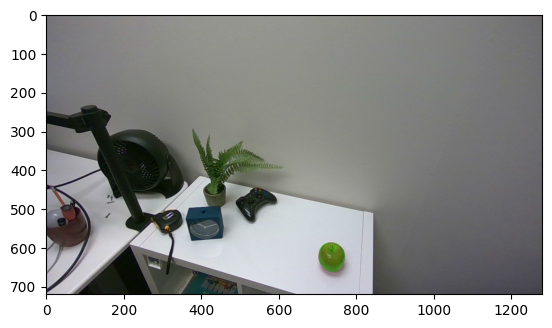

[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [74]:
pose = ow_detector.get_target_object_pose(arm_image, depth_arm_image, mask, visualize=True)

In [75]:
pose

array([[   -0.48893,     0.85593,     0.16832,    -0.19747],
       [   -0.79143,    -0.51641,     0.32707,    -0.52665],
       [    0.36686,      0.0267,     0.92989,     0.84795],
       [          0,           0,           0,           1]])

In [76]:
from ai2thor.robot_grasping import VIDAGraspPlanner
planner = VIDAGraspPlanner()

In [77]:
c.step("Pass")
c.last_event.metadata["arm"]

['Pass']  action completed:  1.2086360454559326
Getting ALL Observations
all images respone time: 0.9409668445587158
[Step] Processing time:  2.327916145324707
Last Event constructed.  2.3291127681732178


{'extension_force': 0.0,
 'extension_m': 0.002940157428383827,
 'lift_force': 0.0,
 'lift_m': 0.934821605682373,
 'wrist_degrees': -162.6708984375,
 'wrist_effort_percent': 0.0,
 'grip_percent': 39.66345977783203,
 'grip_effort': 0.0}

In [78]:
object_position=pose[:3,3]
object_position

array([   -0.19747,    -0.52665,     0.84795])

In [79]:
GRIPPER_LENGTH_205 = 0.210 #0.230

object_position=pose[:3,3]
isReachable, actions = planner.plan_grasp_trajectory(object_position, c.last_event, distance=GRIPPER_LENGTH_205)
actions["action"]


Wrist position from base frame: [      -0.04    -0.12794      1.1548]
0.002940157428383827
nnew arm position is too long:.  0.5376477322944018


[{'action': 'MoveGrasp', 'args': {'move_scalar': 100}},
 {'action': 'WristTo', 'args': {'move_to': 48.57652090477491}},
 {'action': 'MoveArmExtension', 'args': {'move_scalar': 0.25976766999870593}},
 {'action': 'MoveArmBase', 'args': {'move_scalar': -0.13386796763056813}}]

In [83]:
#for adict in actions["actions"]:
#    c.step(adict)
c.step({"action": [actions["action"][3]]})

[{'action': 'MoveArmBase', 'args': {'move_scalar': -0.13386796763056813}}]  action completed:  3.351470947265625
Getting ALL Observations
all images respone time: 0.9166080951690674
[Step] Processing time:  4.3305370807647705
Last Event constructed.  4.331702947616577


<ai2thor.server.Event at 0x3e917dc40
    .metadata["lastAction"] = {'action': [{'action': 'MoveArmBase', 'args': {'move_scalar': -0.13386796763056813}}]}
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "0
    .metadata["actionReturn"] = []
>

In [84]:
c.step({"action": [{'action': 'MoveGrasp', 'args': {'move_scalar': -50}}]})

[{'action': 'MoveGrasp', 'args': {'move_scalar': -50}}]  action completed:  2.618529796600342
Getting ALL Observations
all images respone time: 0.9630920886993408
[Step] Processing time:  3.6537017822265625
Last Event constructed.  3.654918909072876


<ai2thor.server.Event at 0x3b2d68c10
    .metadata["lastAction"] = {'action': [{'action': 'MoveGrasp', 'args': {'move_scalar': -50}}]}
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "0
    .metadata["actionReturn"] = []
>

In [65]:
c.step({"action": [ {'action': 'MoveArmBase', 'args': {'move_scalar': 0.1}}]})

[{'action': 'MoveArmBase', 'args': {'move_scalar': 0.1}}]  action completed:  2.691323757171631
Getting ALL Observations
all images respone time: 0.9288341999053955
[Step] Processing time:  3.683964967727661
Last Event constructed.  3.684908151626587


<ai2thor.server.Event at 0x3b2ea7df0
    .metadata["lastAction"] = {'action': [{'action': 'MoveArmBase', 'args': {'move_scalar': 0.1}}]}
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "0
    .metadata["actionReturn"] = []
>